# Kansas City crime data analysis for the past 6 years

In [654]:
# Importing the modules 

import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import calendar
from datetime import date

In [557]:
#Listing all the dataset files inside the folder
file_list= [file for file in os.listdir(r'C:\Users\datta\OneDrive\Desktop\PDS_PROJECT\kansas-city-crime-new-analysis')]
col_list= ['Report_No', 'Reported_Date','From_Time', 'Offense','Sex','Race','Description',
       'Address', 'City', 'Zip Code','Involvement','Area','Fire_Arm_Used_Flag']

df_lst=[]

#Reading files from the Folder

for file in file_list:
    if file.startswith("KCPD"):
        df=pd.read_csv('C:\\Users\\datta\\OneDrive\\Desktop\\PDS_PROJECT\\kansas-city-crime-new-analysis\\'+file,usecols=col_list,low_memory=False)
        df_lst.append(df)

df=pd.concat(df_lst,axis=0,ignore_index=True)
df.head(3)
df.columns=['Report_No', 'Reported_Date', 'From_Time', 'Offense', 'Description',
       'Address', 'City', 'Zip_Code', 'Area', 'Involvement', 'Race', 'Sex',
       'Fire_Arm_Used_Flag']
df.columns

Index(['Report_No', 'Reported_Date', 'From_Time', 'Offense', 'Description',
       'Address', 'City', 'Zip_Code', 'Area', 'Involvement', 'Race', 'Sex',
       'Fire_Arm_Used_Flag'],
      dtype='object')

In [558]:
df.head(3)

,Report_No,Reported_Date,From_Time,Offense,Description,Address,City,Zip_Code,Area,Involvement,Race,Sex,Fire_Arm_Used_Flag
0,170096892.0,11/14/2017,15:06,630.0,Stealing Shoplifting,200 W 6TH,KANSAS CITY,64105.0,NaN,VIC,NaN,NaN,N
1,170021297.0,03/25/2017,18:26,1850.0,Possession of Drug E,8900 E US 40 HW,KANSAS CITY,64129.0,EPD,VIC,NaN,NaN,N
2,170069219.0,08-07-2017,14:40,2655.0,Trespassing,7100 NW BARRY RD,KANSAS CITY,64151.0,NPD,VIC,NaN,NaN,N


In [559]:
# Dropping the Null columns
df=df.dropna()

# Extracting year,hour, month, Day from the Reported_Date
df['year']=df['Reported_Date'].str[6:]
df['year']= df['year'].astype(int)
df['Full_Address']= df['Address'] + ' '+ df['City'] +  ' '+ df['Zip_Code'].astype(str)
df['month']=df['Reported_Date'].str[0:2]
df['month']= df['month'].astype(int)
df['Day_of_Week'] = df['Reported_Date'].apply(lambda x: pd.Timestamp(x).day_name())
df=df[df['year'].isin([2017,2018,2019,2020,2021,2022])]
df['hour']= df['From_Time'].str[0:2]
df.drop(df[df['hour']==':'].index, inplace=True)
df['hour']= df['hour'].astype(int)

# converting Description column to lower case
df['Description']=df['Description'].apply(lambda x: x.lower())

df=df[df['Race'].isin(['B','I','U','W'])]


# Extracting only the columns that has city name with kan to make sure it only has kansas city
df=df[df['City'].str.startswith('KAN')]
df['City']='KANSAS CITY'


In [563]:
#Removing the duplicate values from the dataframe

df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()





0

In [564]:
# the below function is used to compare the values in the hour column and if it is between [18,6] then its night else its day.

def day_time_cal(x):
    if (x>=18) or (x<=6):
        return 'night'
    else:
        return 'day'
df['Light']= df['hour'].apply(day_time_cal)

In [565]:
df.to_csv(r'C:\Users\datta\OneDrive\Desktop\PDS_PROJECT\kansas-city-crime-new-analysis\Cleaned_Data.csv',index=False)

df.head(2)

,Report_No,Reported_Date,From_Time,Offense,Description,Address,City,Zip_Code,Area,Involvement,Race,Sex,Fire_Arm_Used_Flag,year,Full_Address,month,Day_of_Week,hour,Light
3,170107018.0,12/23/2017,20:10,802.0,non aggravated assault domestic,7000 E 113 TE,KANSAS CITY,64134.0,SPD,VIC,B,F,N,2017,7000 E 113 TE KANSAS CITY 64134.0,12,Saturday,20,night
4,170077301.0,09-04-2017,18:00,302.0,armed robbery,E 39 ST and NORTON AV,KANSAS CITY,64130.0,EPD,SUS,B,M,N,2017,E 39 ST and NORTON AV KANSAS CITY 64130.0,9,Monday,18,night


In [569]:
# Performing groupby to groups rows that have the same values into summary rows

df.groupby('Fire_Arm_Used_Flag')['Reported_Date'].count()

Fire_Arm_Used_Flag
N    386992
Y     32805
Name: Reported_Date, dtype: int64

In [570]:
# From the replacing False with N and true with Y

df['Fire_Arm_Used_Flag']= df['Fire_Arm_Used_Flag'].replace({False:'N',True:'Y'})

In [571]:
# Performing groupby to groups Fire_Arm_Used_Flag rows that have the same values into summary rows

df.groupby('Fire_Arm_Used_Flag')['Reported_Date'].count()

Fire_Arm_Used_Flag
N    386992
Y     32805
Name: Reported_Date, dtype: int64

In [572]:
# Performing groupby to group year rows that have the same values into summary rows

grp_year = df.groupby(['year'])['Report_No'].count()
grp_year

year
2017    99370
2018    97652
2019    41111
2020    61578
2021    65570
2022    54516
Name: Report_No, dtype: int64

In [573]:
# Performing groupby to month  rows that have the same values into summary rows

grp_month = df.groupby(['month'])['Report_No'].count()
grp_month

month
1     31112
2     27686
3     32876
4     35176
5     38937
6     38957
7     41252
8     41275
9     39967
10    36052
11    29792
12    26715
Name: Report_No, dtype: int64

In [574]:
# Performing groupby to group Day_of_week rows that have the same values into summary rows

grp_day=df.groupby(['Day_of_Week'])['Report_No'].count()
grp_day = grp_day.reindex(
    index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
grp_day

Day_of_Week
Monday       63646
Tuesday      61683
Wednesday    60650
Thursday     58662
Friday       59771
Saturday     57960
Sunday       57425
Name: Report_No, dtype: int64

In [575]:
# Performing groupby to compare the crime count in day and night

light_count = df.groupby(['Light'])['Report_No'].count()
#print('Most crimes were committed during the', light_count.idxmax())
light_count

Light
day      200112
night    219685
Name: Report_No, dtype: int64

In [576]:
# Performing groupby to group Area rows that have the same values into summary rows
grp_area=df.groupby(['Area'])['Report_No'].count()
grp_area


Area
CPD    103367
EPD    107239
MPD     83726
NPD     33594
SCP     40371
SPD     51500
Name: Report_No, dtype: int64

In [577]:
#  Performing groupby to  know the area with most shooting happened

shootings_area_grp = df.loc[df['Fire_Arm_Used_Flag'] == 'Y'].groupby(
    ['Area'])['Report_No'].count()
#print('District with most shootings is', shootings_area_grp.idxmax())
shootings_area_grp

Area
CPD     6096
EPD    12110
MPD     8013
NPD      924
SCP     1390
SPD     4272
Name: Report_No, dtype: int64

In [578]:
#  Performing groupby to find the count of male and female involved in crime

df.groupby(['Sex'])['Report_No'].count()

df=df[df['Sex'].isin(['F','M','U'])]
df_sex_year=df.groupby(['Sex','year'])['Report_No'].count()


In [579]:
# make_plot function to create barplot for the differnet variables for the above groupby variables

def make_plot(series, xlabel, ylabel, title, images_path, image_name,legend):
    """ Make a bar plot on the given series. """
    sns.set(style="darkgrid")

    norm = plt.Normalize(0, series.values.max())
    colors = plt.cm.Blues(norm(series.values))
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(x=series.index, y=series.values, palette=colors)
    ax.set(ylabel=ylabel, xlabel=xlabel)
    plt.title(title)
    plt.legend(legend)
    # save plot to an image
    plt.savefig(images_path + image_name, bbox_inches="tight")
    plt.show()
    plt.close()

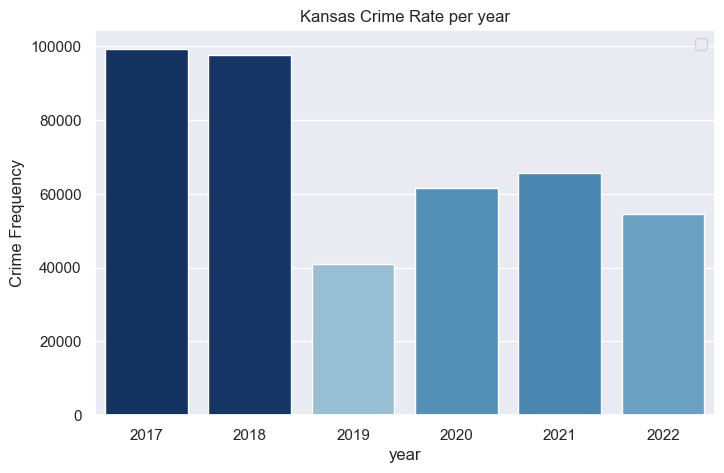

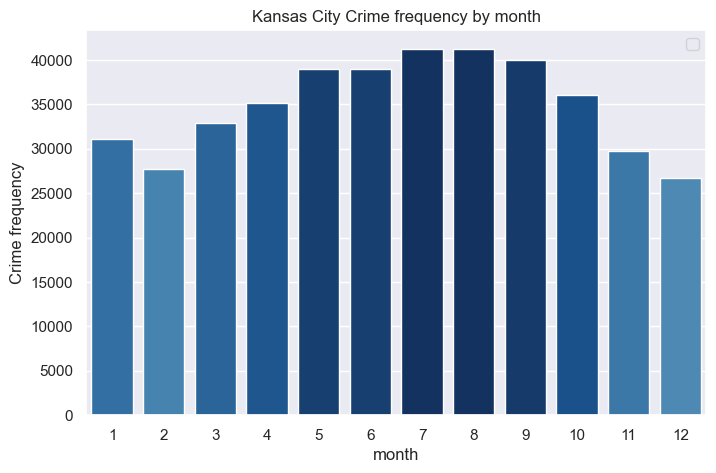

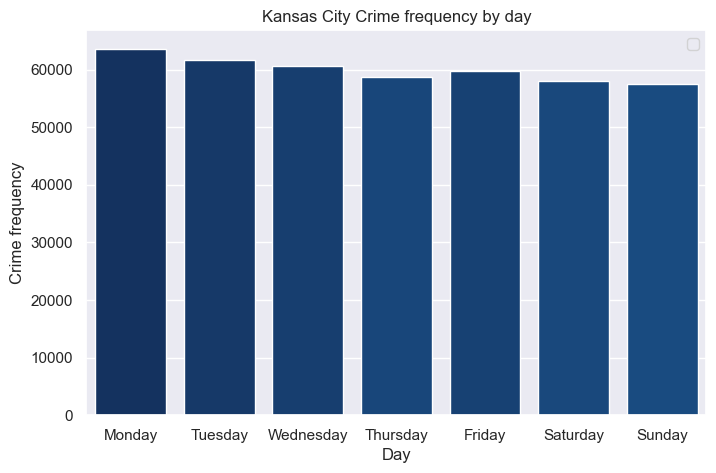

In [580]:
# assigning the path to store the output images of the barplots

images_path= "C:\\Users\\datta\\OneDrive\\Desktop\\PDS_PROJECT\\kansas-city-crime-new-analysis\\statistical_Analysis\\"

# calling the make_plot function with different groupby variables for plotting
make_plot(grp_year, 'year', 'Crime Frequency',
          'Kansas Crime Rate per year', images_path, 'year.png','')
make_plot(grp_month, 'month', 'Crime frequency',
          'Kansas City Crime frequency by month', images_path, 'month.png','')
make_plot(grp_day, 'Day', 'Crime frequency',
          'Kansas City Crime frequency by day', images_path, 'day.png','')

# We can notice that there was a rise in crime rate during the summer months. Also most crimes were committed on Mondays and least crimes were committed on Sunday.

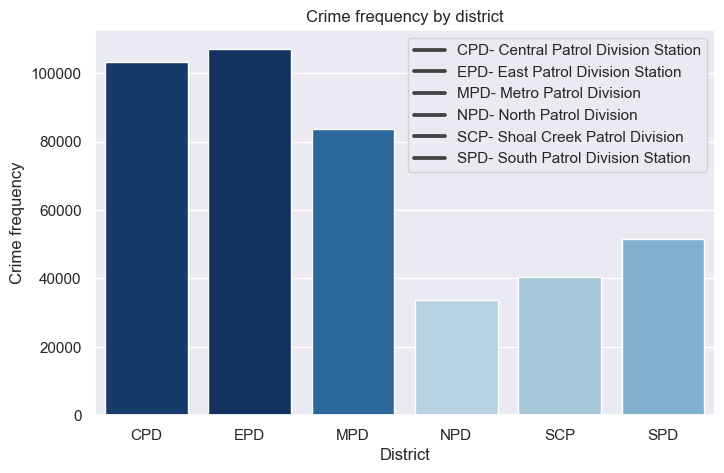

In [581]:
# calling the make_plot function to analyse area wise crime.

make_plot(grp_area, 'District', 'Crime frequency',
          'Crime frequency by district', images_path, 'district.png',['CPD- Central Patrol Division Station','EPD- East Patrol Division Station','MPD- Metro Patrol Division','NPD- North Patrol Division','SCP- Shoal Creek Patrol Division','SPD- South Patrol Division Station'])

In [582]:
shootings_year_group = df.loc[df['Fire_Arm_Used_Flag'] == 'Y'].groupby(
    ['year'])['Report_No'].count()
#print('Year with most shootings is', shootings_year_group.idxmax())

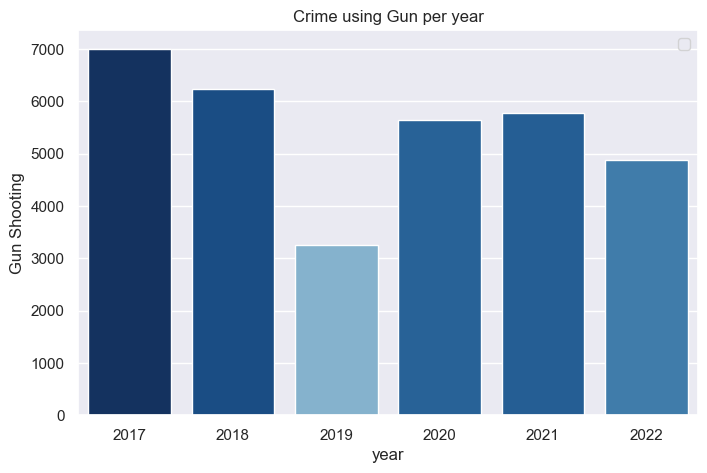

In [583]:
# make_plot function to create barplot for the differnet variables for the above groupby variables
make_plot(shootings_year_group, 'year', 'Gun Shooting',
          'Crime using Gun per year',images_path, 'shooting_year.png','')


# Year with most shootings is 2017


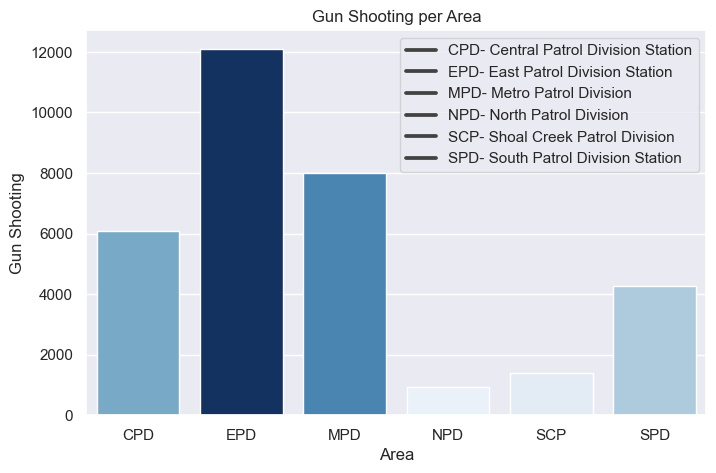

In [584]:
# make_plot function to create barplot for the differnet variables for the above groupby variables.
make_plot(shootings_area_grp, 'Area', 'Gun Shooting',
          'Gun Shooting per Area',images_path, 'shooting_area.png',['CPD- Central Patrol Division Station','EPD- East Patrol Division Station','MPD- Metro Patrol Division','NPD- North Patrol Division','SCP- Shoal Creek Patrol Division','SPD- South Patrol Division Station'])

# Area with most shooting is EPD

# we can finally conclude that the year with the highest crime rate (2017) had the more number of shootings

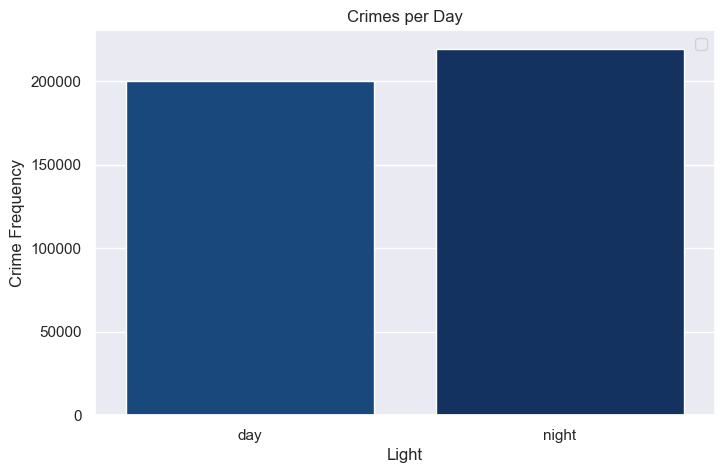

In [585]:
make_plot(light_count, 'Light', 'Crime Frequency',
          'Crimes per Day',images_path, 'light.png','')

# We can observe that Crimes are higher duing Night Time than Day Time

In [586]:
# Finding the most frequent type of crime in night time

light_group = df.loc[df['Light'] == 'night'].groupby(
    ['Description'])['Report_No'].count()
print('Most frequent type of crime during the Night is', light_group.idxmax())

Most frequent type of crime during the Night is motor vehicle theft


# From the above code logic we can conclude that the most frequent type of crime during the night is "Motor Vehicle Theft"

In [587]:
# Displaying the number count of male and female involved in the crime

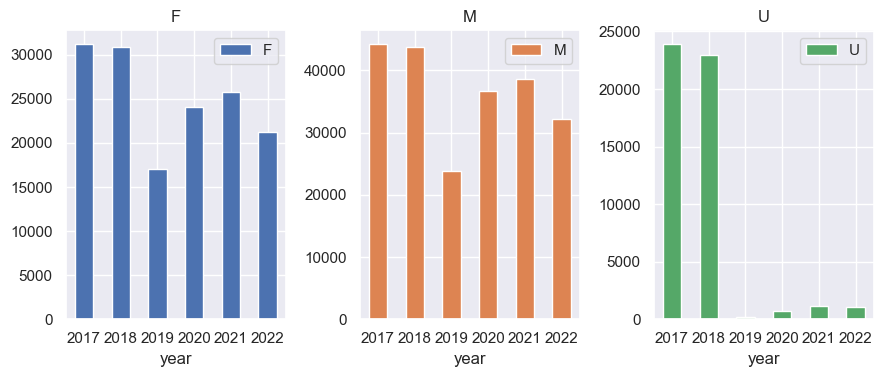

In [588]:
ax = df_sex_year.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(9, 7), layout=(2, 3))
plt.tight_layout()

In [606]:
grp_race=df.groupby(['Race'])['Report_No'].count()
grp_race

Race
B    179546
I       931
U     62127
W    177193
Name: Report_No, dtype: int64

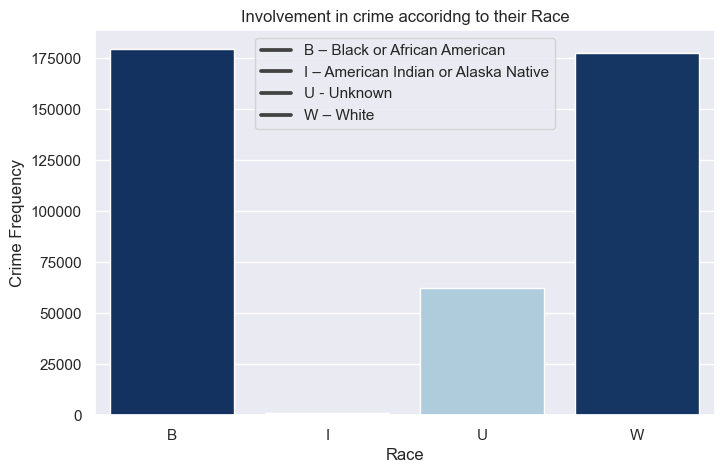

In [591]:
make_plot(grp_race, 'Race', 'Crime Frequency',
          'Involvement in crime accoridng to their Race',images_path, 'Race_grp.png',['B – Black or African American', 'I – American Indian or Alaska Native', 'U - Unknown', 'W – White'])

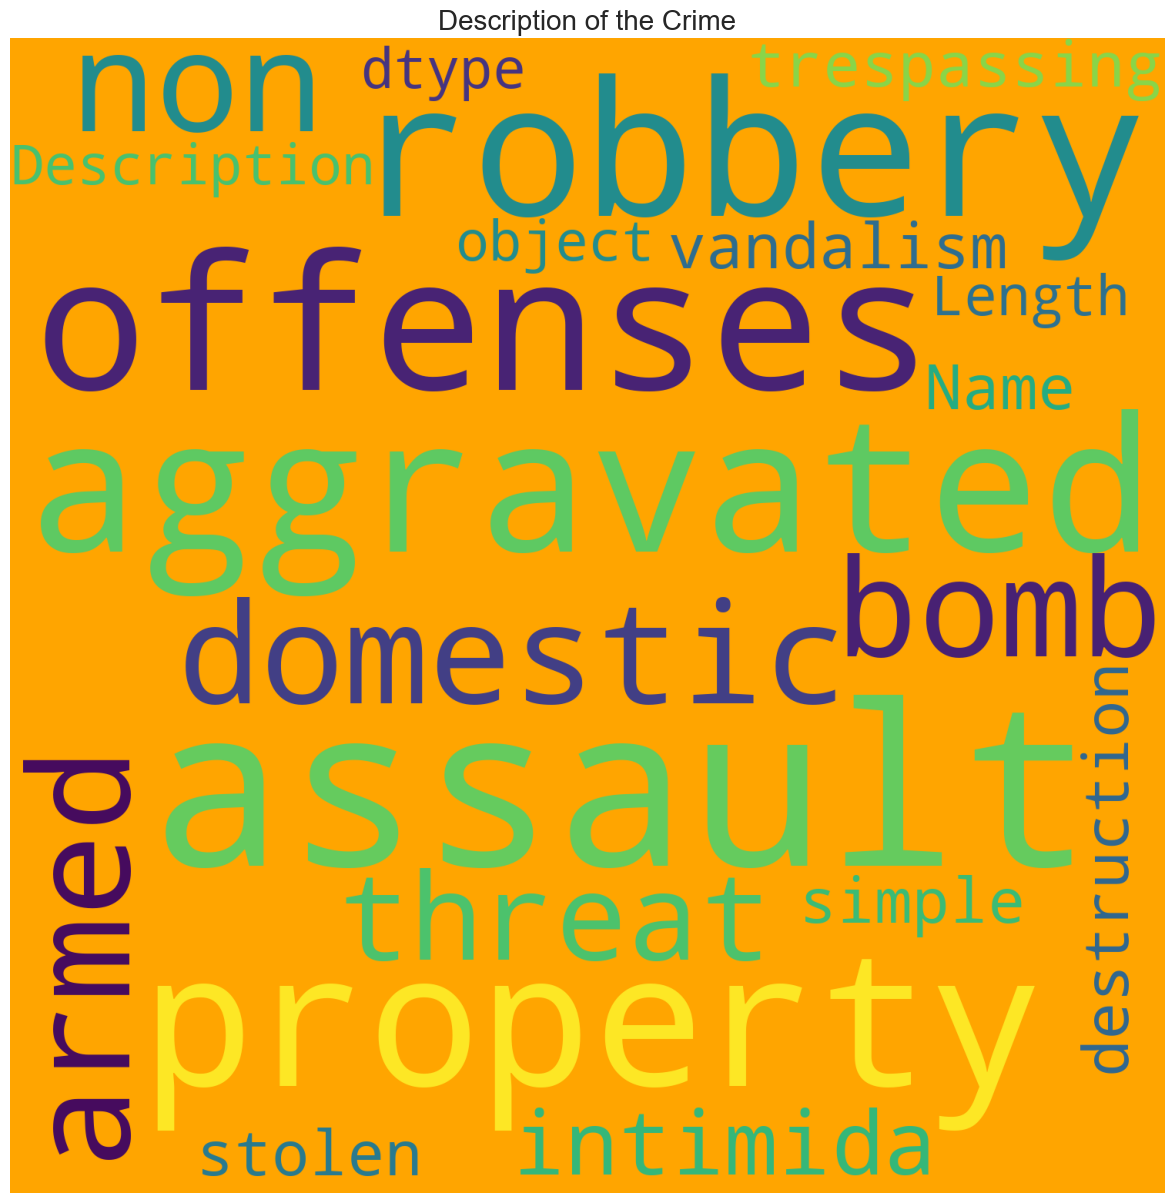

In [592]:
# description of the crime

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fast')
wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(df['Description']))

plt.title('Description of the Crime', fontsize = 20)
plt.imshow(wc)
plt.axis('off')
plt.show()

# Top 10 Crimes in Kansas City since last 6 years

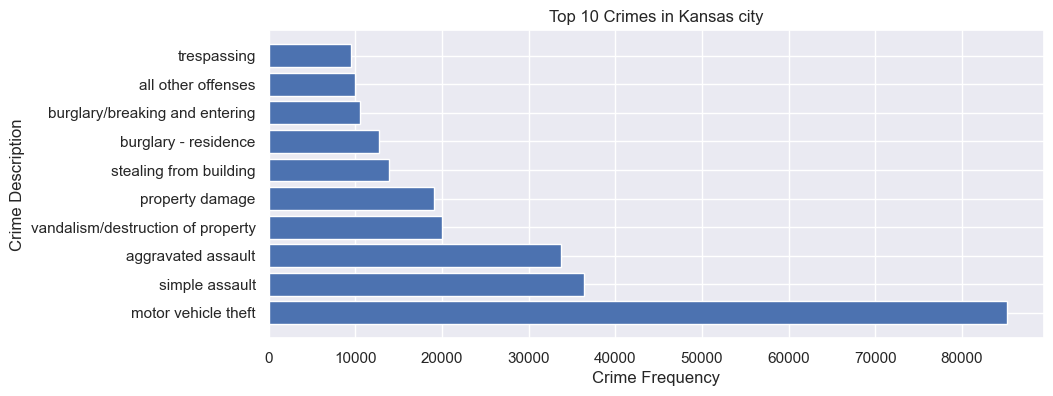

In [593]:
crime_desc = df['Description'].value_counts(ascending=False)
top_crimes=crime_desc.head(10)
plt.figure(figsize=(10,4))
plt.barh(top_crimes.index, top_crimes.values)
plt.ylabel("Crime Description") 
 
# setting label of x-axis
plt.xlabel("Crime Frequency")
plt.title("Top 10 Crimes in Kansas city")
plt.show()

In [610]:
test=df.groupby(['Offense'])['Report_No'].count()

In [612]:
test.to_csv('C:\\Users\\datta\\OneDrive\\Desktop\\PDS_PROJECT\\kansas-city-crime-new-analysis\\test.csv')